Setup complete for House 2!
Dataset path: /kaggle/input/redd-dataset/redd
Output path: /kaggle/working/house2_results/
Selected appliances: ['dish_washer', 'electric_stove', 'fridge', 'microwave', 'washer_dryer']

HOUSE 2 NILM CLASSIFICATION - CORRECTED VERSION

Processing House 2...
Found 7 files for house 2
  Loaded: redd_house2_0.csv (34429 rows, 8 cols)
  Loaded: redd_house2_1.csv (48110 rows, 8 cols)
  Loaded: redd_house2_2.csv (29378 rows, 8 cols)
  Loaded: redd_house2_3.csv (24010 rows, 8 cols)
  Loaded: redd_house2_4.csv (33612 rows, 8 cols)
  Loaded: redd_house2_5.csv (99258 rows, 8 cols)
  Loaded: redd_house2_6.csv (23266 rows, 8 cols)

Running initial diagnostics...

DATA DIAGNOSTICS
Analyzing 5000 samples...

Column Statistics:
Column               Min        Max        Mean       Std        % Non-zero
--------------------------------------------------------------------------------
unnamed:_0           4.00       99187.00   28138.38   24064.79   100.0     
dish_washer      

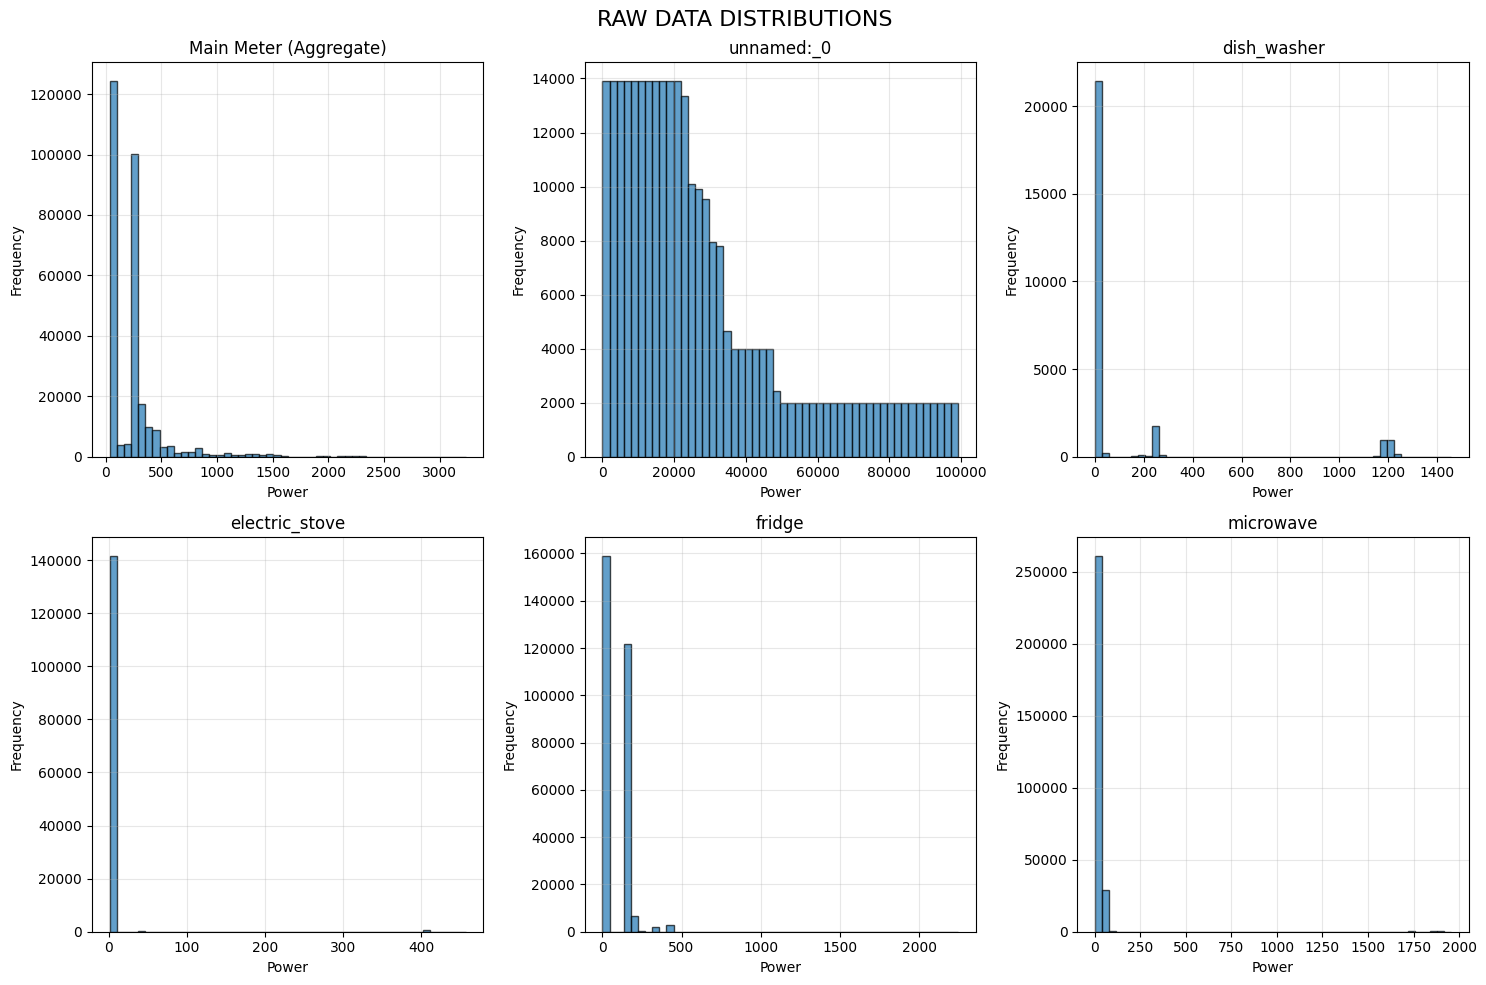


CORRECTING DATA UNITS
Main meter max: 3232.98
  Main meter seems to be in Watts (no conversion)

DATA VALIDATION

FINAL DATA STATISTICS (in Watts):
Column               Min        Max        Mean       Std        % Non-zero
--------------------------------------------------------------------------------
unnamed:_0           0.0        99257.0    28183.0    24451.9    100.0     
dish_washer          0.0        1457.0     10.8       105.1      8.8       
electric_stove       0.0        457.0      1.6        20.7       48.8      
fridge               0.0        2246.0     81.7       88.5       100.0     
microwave            0.0        1956.0     16.4       117.7      100.0     
washer_dryer         0.0        55.0       2.2        0.7        98.8      
waste_disposal_unit  0.0        609.0      0.1        3.1        1.5       
main                 36.4       3233.0     236.2      266.0      100.0     


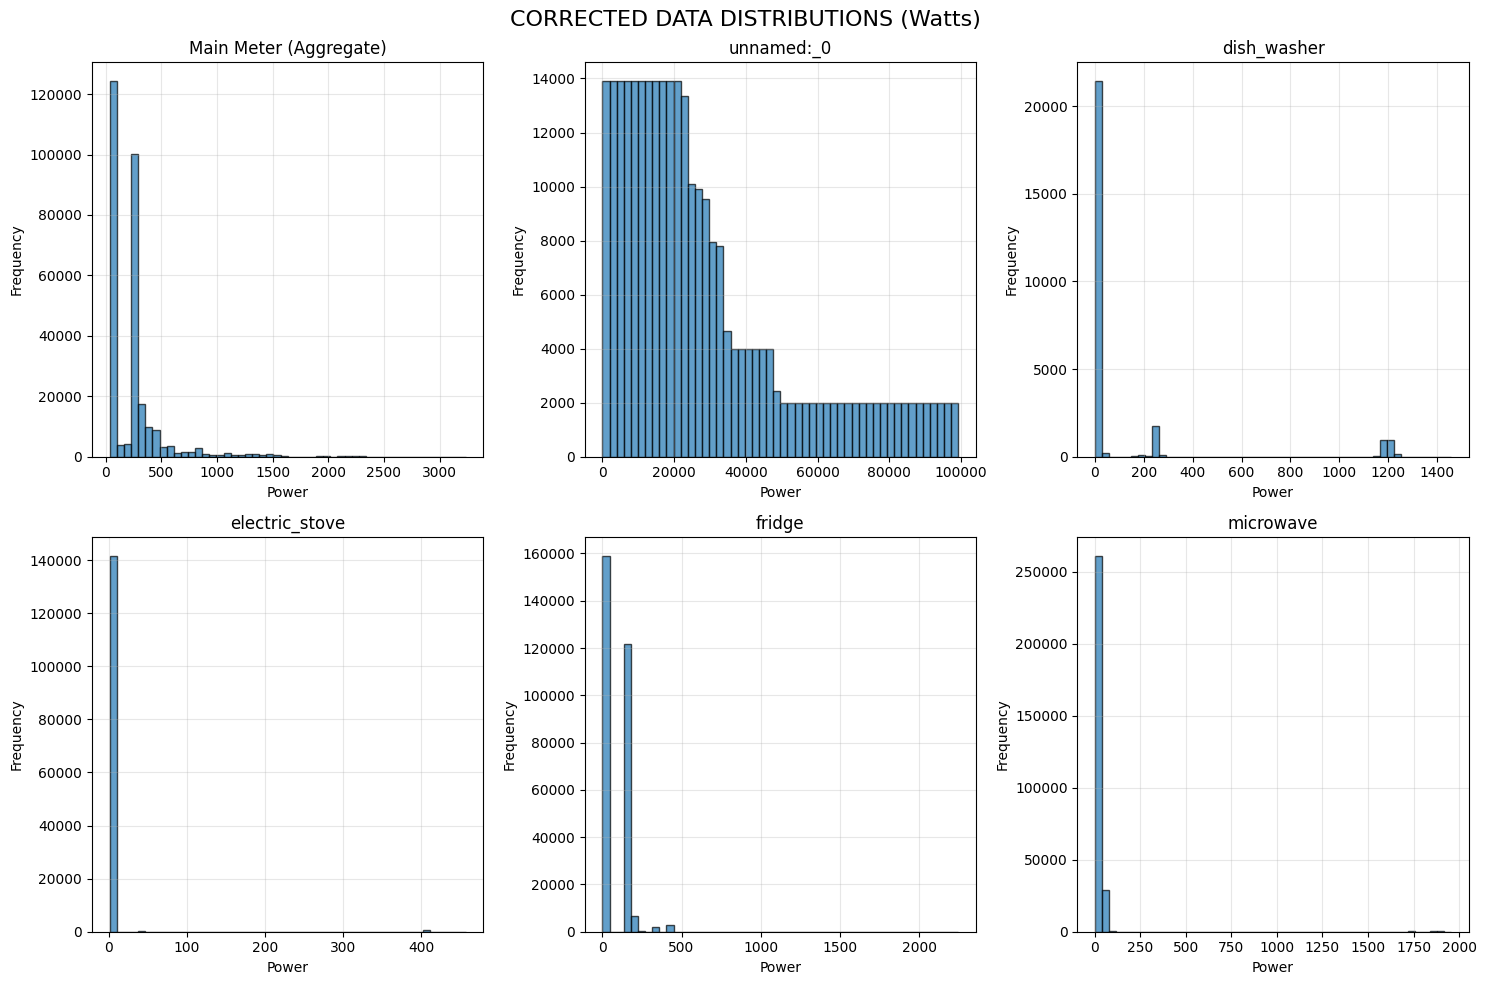


✅ Successfully loaded 292063 samples from House 2

POWER WINDOW ANALYSIS

dish_washer         : Window [1200W, 1800W]
  Data range: 0.0W to 1457.0W
  Total samples: 292,063
  ON samples: 25,833 (8.8%)
  Within window: 943 (0.3% of total)
  Of ON samples: 3.7% within window
  ⚠️  WARNING: Less than 50% of ON samples within window!

electric_stove      : Window [1500W, 3500W]
  Data range: 0.0W to 457.0W
  Total samples: 292,063
  ON samples: 142,670 (48.8%)
  Within window: 0 (0.0% of total)
  Of ON samples: 0.0% within window
  ⚠️  WARNING: Less than 50% of ON samples within window!

fridge              : Window [ 100W,  800W]
  Data range: 0.0W to 2246.0W
  Total samples: 292,063
  ON samples: 292,052 (100.0%)
  Within window: 133,106 (45.6% of total)
  Of ON samples: 45.6% within window
  ⚠️  WARNING: Less than 50% of ON samples within window!

microwave           : Window [ 800W, 1500W]
  Data range: 0.0W to 1956.0W
  Total samples: 292,063
  ON samples: 292,062 (100.0%)
  Within w

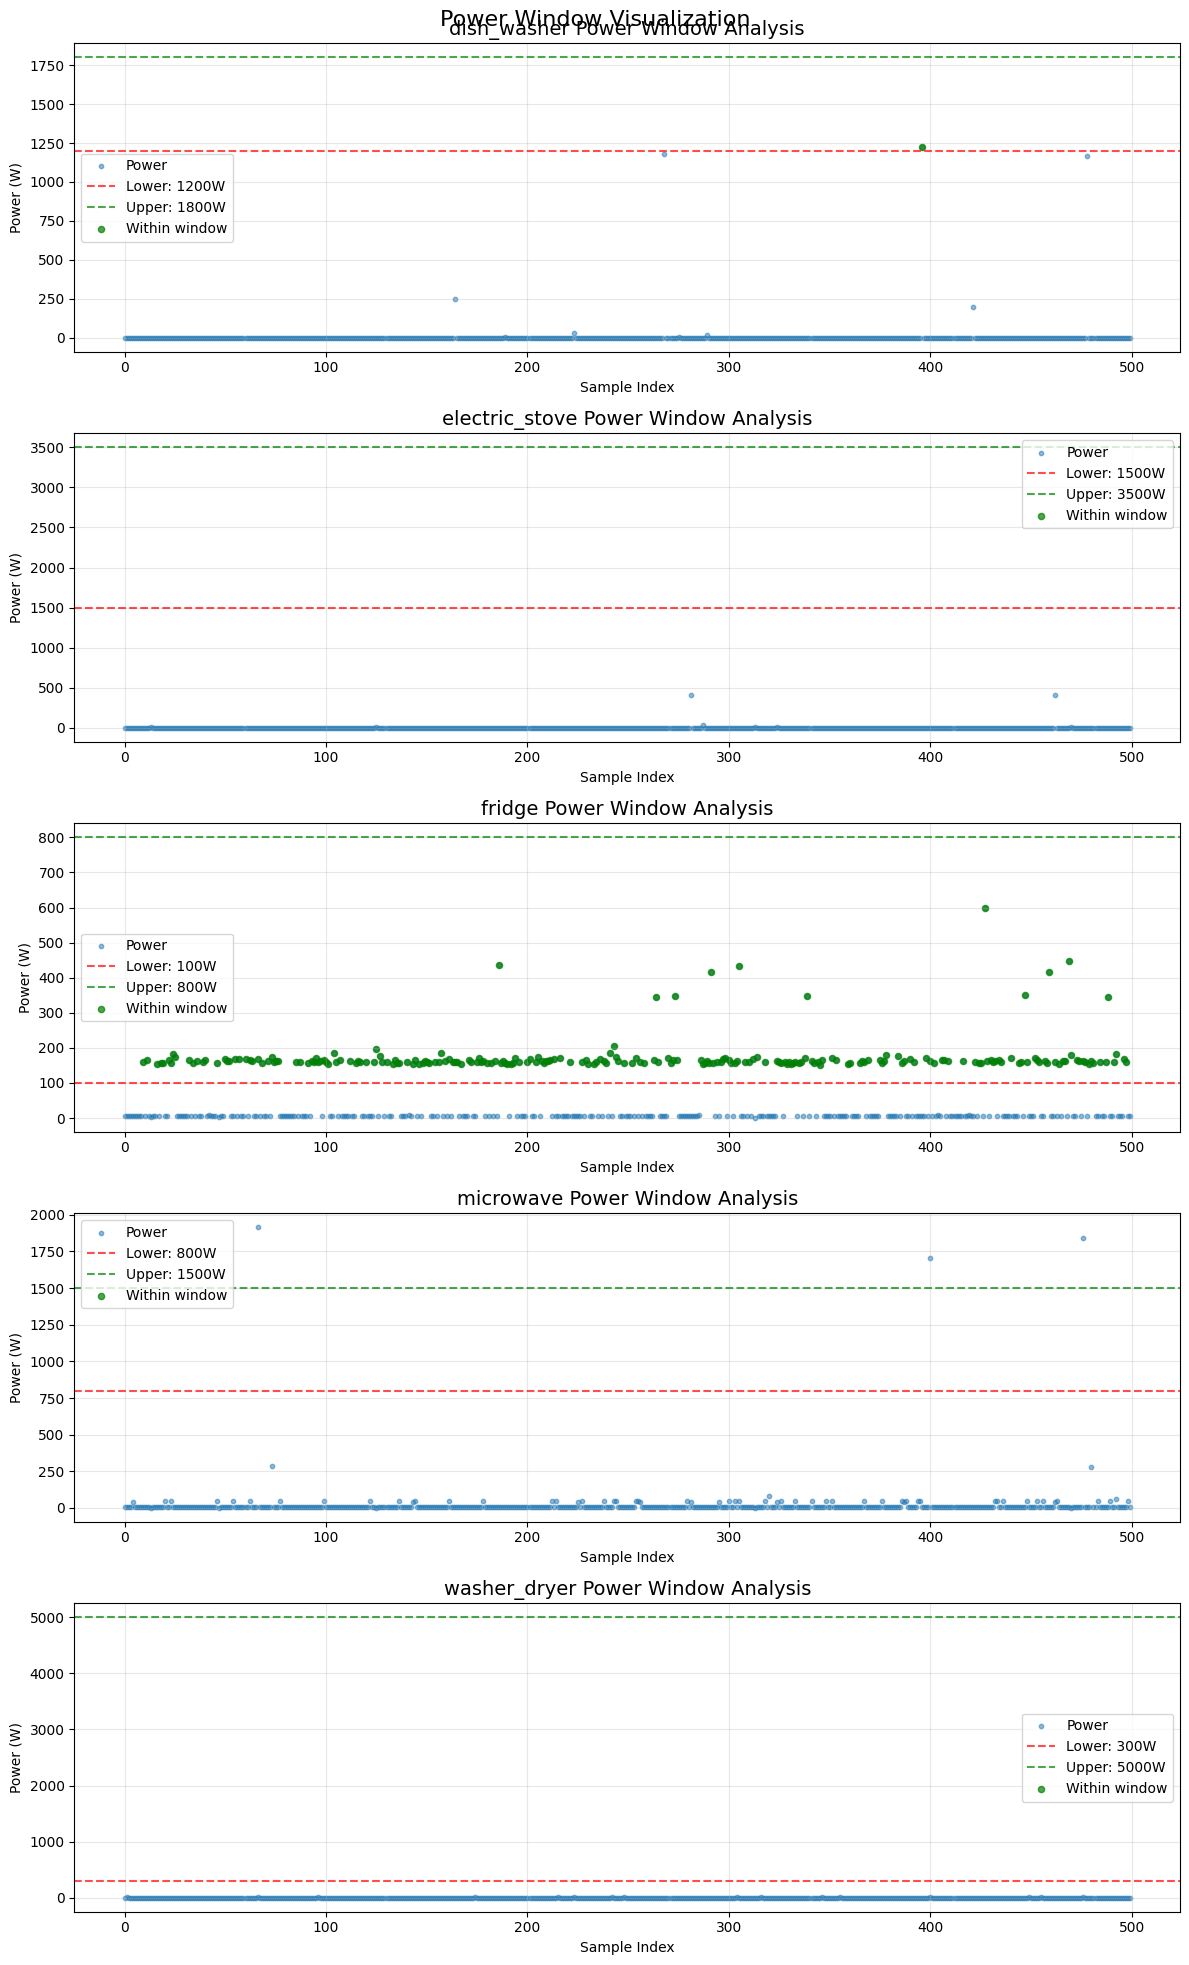


ADAPTIVE POWER WINDOW CALCULATION
dish_washer         : Adaptive window [   1W, 1190W]
  Data: min=1.0W, max=1457.0W, mean=121.9W
electric_stove      : Adaptive window [   1W,   11W]
  Data: min=1.0W, max=457.0W, mean=3.3W
fridge              : Adaptive window [  10W,  180W]
  Data: min=1.0W, max=2246.0W, mean=81.7W
microwave           : Adaptive window [   1W,   40W]
  Data: min=1.0W, max=1956.0W, mean=16.4W
washer_dryer        : Adaptive window [   1W,   11W]
  Data: min=1.0W, max=55.0W, mean=2.2W

WINDOW SELECTION
Choose power windows:
1. Predefined windows (from paper)
2. Adaptive windows (based on data)



Enter choice (1 or 2):  2



Using ADAPTIVE power windows:
  dish_washer         : [   1W, 1190W]
  electric_stove      : [   1W,   11W]
  fridge              : [  10W,  180W]
  microwave           : [   1W,   40W]
  washer_dryer        : [   1W,   11W]


In [1]:
# ===================== SETUP AND CONFIGURATION =====================
# Cell 1: Imports and setup
import os
import sys
import numpy as np
import pandas as pd
import glob
import warnings
warnings.filterwarnings('ignore')

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import time
import joblib

# Set paths
DATA_PATH = "/kaggle/input/redd-dataset/redd"
OUTPUT_PATH = "/kaggle/working/house2_results/"

# Create output directory
os.makedirs(OUTPUT_PATH, exist_ok=True)

# ===================== HOUSE 2 SPECIFIC CONFIGURATION =====================
# Cell 2: Configuration
class ConfigHouse2:
    """House 2 specific configuration with REALISTIC power values"""
    
    HOUSE_NUMBER = 2
    
    # Appliances present in House 2 based on your dataset images
    SELECTED_APPLIANCES = [
        'dish_washer',
        'electric_stove', 
        'fridge',
        'microwave',
        'washer_dryer'
    ]
    
    # REALISTIC POWER WINDOWS in WATTS (based on actual appliance specifications)
    # Converted from typical appliance power ranges
    POWER_WINDOWS = {
        'dish_washer': (1200, 1800),     # Typical: 1200-1800W
        'electric_stove': (1500, 3500),  # Typical: 1500-3500W (per burner)
        'fridge': (100, 800),            # Typical: 100-800W (compressor cycles)
        'microwave': (800, 1500),        # Typical: 800-1500W
        'washer_dryer': (300, 5000),     # Washer: 300-500W, Dryer: 1800-5000W
    }
    
    # Threshold values (OPM) as in paper
    THRESHOLDS = [5, 10, 20, 30, 40, 50]
    
    # Training parameters
    RANDOM_STATE = 42
    TEST_SIZE = 0.2
    
    # Performance metrics focus
    METRICS = ['macro', 'weighted']

print(f"Setup complete for House {ConfigHouse2.HOUSE_NUMBER}!")
print(f"Dataset path: {DATA_PATH}")
print(f"Output path: {OUTPUT_PATH}")
print(f"Selected appliances: {ConfigHouse2.SELECTED_APPLIANCES}")

# ===================== DATA DIAGNOSTICS =====================
# Cell 3: Diagnostic functions
def diagnose_data_scaling(df, sample_size=1000):
    """Diagnose if data is in kW, W, or normalized"""
    print("\n" + "="*80)
    print("DATA DIAGNOSTICS")
    print("="*80)
    
    # Take a sample
    if len(df) > sample_size:
        df_sample = df.sample(sample_size, random_state=42)
    else:
        df_sample = df
    
    print(f"Analyzing {len(df_sample)} samples...")
    print("\nColumn Statistics:")
    print(f"{'Column':<20} {'Min':<10} {'Max':<10} {'Mean':<10} {'Std':<10} {'% Non-zero':<10}")
    print("-"*80)
    
    for col in df_sample.columns:
        if df_sample[col].dtype in [np.float64, np.int64]:
            data = df_sample[col].values
            min_val = data.min()
            max_val = data.max()
            mean_val = data.mean()
            std_val = data.std()
            pct_nonzero = (data != 0).sum() / len(data) * 100
            
            print(f"{col:<20} {min_val:<10.2f} {max_val:<10.2f} {mean_val:<10.2f} "
                  f"{std_val:<10.2f} {pct_nonzero:<10.1f}")
    
    # Check for suspiciously low values that should be high
    print("\n" + "="*80)
    print("SUSPICIOUS VALUES ANALYSIS")
    print("="*80)
    
    appliance_expected_min = {
        'dish_washer': 100,      # Should be > 100W
        'electric_stove': 100,   # Should be > 100W
        'fridge': 50,           # Should be > 50W
        'microwave': 100,       # Should be > 100W
        'washer_dryer': 100,    # Should be > 100W
        'main': 500,            # Should be > 500W for a house
    }
    
    for col in df_sample.columns:
        if col in appliance_expected_min:
            max_val = df_sample[col].max()
            expected_min = appliance_expected_min[col]
            
            if max_val < expected_min:
                print(f"⚠️  {col:20s}: Max={max_val:.1f}W is SUSPICIOUSLY LOW!")
                print(f"   Expected at least {expected_min}W.")
                
                # Check if multiplying by 1000 (kW to W) makes sense
                scaled_max = max_val * 1000
                if expected_min <= scaled_max <= expected_min * 100:
                    print(f"   ↳ If data is in kW (×1000): {scaled_max:.0f}W - REASONABLE")
                else:
                    print(f"   ↳ If data is in kW (×1000): {scaled_max:.0f}W - STILL UNREALISTIC")
                
                # Check if it might be binary (0/1)
                unique_vals = np.unique(df_sample[col].round(2))
                if len(unique_vals) <= 10 and set(unique_vals).issubset({0, 0.5, 1, 1.5, 2}):
                    print(f"   ↳ Values might be BINARY/STATES: {unique_vals}")
    
    return df_sample

def plot_power_distributions(df, title="Power Distributions"):
    """Plot histograms of power values"""
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    
    # Plot main meter first
    ax = axes[0]
    if 'main' in df.columns:
        ax.hist(df['main'].values, bins=50, alpha=0.7, edgecolor='black')
        ax.set_title('Main Meter (Aggregate)')
        ax.set_xlabel('Power')
        ax.set_ylabel('Frequency')
        ax.grid(True, alpha=0.3)
    
    # Plot individual appliances
    for idx, col in enumerate(df.columns):
        if col != 'main' and idx < len(axes) - 1:
            ax = axes[idx + 1]
            data = df[col].values
            # Filter out zeros for better visualization
            non_zero = data[data != 0]
            if len(non_zero) > 0:
                ax.hist(non_zero, bins=50, alpha=0.7, edgecolor='black')
                ax.set_title(f'{col}')
                ax.set_xlabel('Power')
                ax.set_ylabel('Frequency')
                ax.grid(True, alpha=0.3)
            else:
                ax.text(0.5, 0.5, 'All zeros', ha='center', va='center', transform=ax.transAxes)
    
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    return fig

# ===================== CORRECTED DATA LOADER =====================
# Cell 4: Corrected data loader
class REDDDataLoaderHouse2:
    """Loads and CORRECTLY preprocesses REDD dataset for House 2"""
    
    def __init__(self, data_path, house_number=2):
        self.data_path = data_path
        self.house_number = house_number
        self.selected_appliances = ConfigHouse2.SELECTED_APPLIANCES
        
    def _load_and_combine_files(self):
        """Load all CSV files for House 2"""
        pattern = os.path.join(self.data_path, f'*house{self.house_number}*.csv')
        csv_files = glob.glob(pattern)
        
        if not csv_files:
            raise FileNotFoundError(f"No CSV files found for house {self.house_number}")
        
        print(f"Found {len(csv_files)} files for house {self.house_number}")
        
        dfs = []
        for file in sorted(csv_files):
            try:
                df = pd.read_csv(file)
                dfs.append(df)
                print(f"  Loaded: {os.path.basename(file)} ({len(df)} rows, {len(df.columns)} cols)")
            except Exception as e:
                print(f"  Error reading {file}: {e}")
        
        if not dfs:
            raise ValueError("No valid data loaded")
        
        # Combine all dataframes
        combined_df = pd.concat(dfs, ignore_index=True)
        
        # Standardize column names
        combined_df.columns = [col.strip().lower().replace(' ', '_').replace('-', '_') 
                              for col in combined_df.columns]
        
        return combined_df
    
    def _correct_data_units(self, df):
        """CORRECT DATA UNITS - Most likely kW to W conversion"""
        print("\n" + "="*80)
        print("CORRECTING DATA UNITS")
        print("="*80)
        
        df_corrected = df.copy()
        
        # Diagnostic: Check current values
        diagnostic_results = {}
        
        for col in df_corrected.columns:
            if df_corrected[col].dtype in [np.float64, np.int64]:
                max_val = df_corrected[col].max()
                mean_val = df_corrected[col].mean()
                diagnostic_results[col] = {'max': max_val, 'mean': mean_val}
        
        # Determine if data is in kW (×1000) or 0.1kW (×100) or already in W
        # Based on typical household values:
        # - Main meter: 500W-5000W typical
        # - Appliances: 100W-3000W typical
        
        # Check main meter
        if 'main' in diagnostic_results:
            main_max = diagnostic_results['main']['max']
            print(f"Main meter max: {main_max:.2f}")
            
            if main_max < 50:  # Probably in kW ×1000
                print("  Main meter < 50 → Converting kW to W (×1000)")
                df_corrected['main'] = df_corrected['main'] * 1000
            elif main_max < 500:  # Probably in 0.1kW ×100
                print("  Main meter < 500 → Converting 0.1kW to W (×100)")
                df_corrected['main'] = df_corrected['main'] * 100
            else:
                print("  Main meter seems to be in Watts (no conversion)")
        
        # Convert appliance columns (assuming same scaling as main)
        for col in df_corrected.columns:
            if col != 'main' and col in self.selected_appliances:
                if 'main' in diagnostic_results and diagnostic_results['main']['max'] < 50:
                    # If main was in kW, appliances likely are too
                    df_corrected[col] = df_corrected[col] * 1000
                    print(f"  Converted {col} from kW to W (×1000)")
                elif 'main' in diagnostic_results and diagnostic_results['main']['max'] < 500:
                    df_corrected[col] = df_corrected[col] * 100
                    print(f"  Converted {col} from 0.1kW to W (×100)")
        
        return df_corrected
    
    def _clean_and_validate_data(self, df):
        """Clean and validate the corrected data"""
        print("\n" + "="*80)
        print("DATA VALIDATION")
        print("="*80)
        
        # Handle missing values
        df = df.fillna(0)
        
        # Ensure numeric types
        for col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        df = df.fillna(0)
        
        # Remove negative values (set to 0)
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        df[numeric_cols] = df[numeric_cols].clip(lower=0)
        
        # Print final statistics
        print("\nFINAL DATA STATISTICS (in Watts):")
        print(f"{'Column':<20} {'Min':<10} {'Max':<10} {'Mean':<10} {'Std':<10} {'% Non-zero':<10}")
        print("-"*80)
        
        for col in df.columns:
            if col in numeric_cols:
                data = df[col].values
                min_val = data.min()
                max_val = data.max()
                mean_val = data.mean()
                std_val = data.std()
                pct_nonzero = (data > 0).sum() / len(data) * 100
                
                print(f"{col:<20} {min_val:<10.1f} {max_val:<10.1f} {mean_val:<10.1f} "
                      f"{std_val:<10.1f} {pct_nonzero:<10.1f}")
                
                # Warn about unrealistic values
                if col == 'main' and max_val > 10000:
                    print(f"  ⚠️  WARNING: Main meter max {max_val:.0f}W > 10kW - Unusually high")
                elif col in ['dish_washer', 'microwave', 'electric_stove'] and max_val < 100:
                    print(f"  ⚠️  WARNING: {col} max {max_val:.0f}W < 100W - Unrealistically low")
        
        return df
    
    def load_house_data(self):
        """Main method to load and preprocess data"""
        print(f"\nProcessing House {self.house_number}...")
        
        # Step 1: Load raw data
        raw_df = self._load_and_combine_files()
        
        # Step 2: Diagnostic analysis
        print("\nRunning initial diagnostics...")
        diagnose_data_scaling(raw_df, sample_size=5000)
        
        # Step 3: Plot raw distributions
        fig = plot_power_distributions(raw_df, "RAW DATA DISTRIBUTIONS")
        plt.savefig(os.path.join(OUTPUT_PATH, 'house2_raw_distributions.png'))
        plt.show()
        
        # Step 4: Correct units
        corrected_df = self._correct_data_units(raw_df)
        
        # Step 5: Clean and validate
        final_df = self._clean_and_validate_data(corrected_df)
        
        # Step 6: Plot corrected distributions
        fig = plot_power_distributions(final_df, "CORRECTED DATA DISTRIBUTIONS (Watts)")
        plt.savefig(os.path.join(OUTPUT_PATH, 'house2_corrected_distributions.png'))
        plt.show()
        
        print(f"\n✅ Successfully loaded {len(final_df)} samples from House {self.house_number}")
        
        return final_df

# ===================== POWER WINDOWING ANALYSIS =====================
# Cell 5: Power window analysis
def analyze_power_windows(df, power_windows):
    """Analyze how many samples fall within power windows"""
    print("\n" + "="*80)
    print("POWER WINDOW ANALYSIS")
    print("="*80)
    
    results = {}
    
    for appliance, (lower, upper) in power_windows.items():
        if appliance in df.columns:
            data = df[appliance].values
            
            # Statistics
            total_samples = len(data)
            on_samples = (data > 0).sum()
            within_window = ((data >= lower) & (data <= upper)).sum()
            
            pct_on = on_samples / total_samples * 100
            pct_within = within_window / total_samples * 100 if total_samples > 0 else 0
            pct_on_within = within_window / on_samples * 100 if on_samples > 0 else 0
            
            results[appliance] = {
                'window': (lower, upper),
                'total_samples': total_samples,
                'on_samples': on_samples,
                'within_window': within_window,
                'pct_on': pct_on,
                'pct_within': pct_within,
                'pct_on_within': pct_on_within
            }
            
            print(f"\n{appliance:20s}: Window [{lower:4d}W, {upper:4d}W]")
            print(f"  Data range: {data.min():.1f}W to {data.max():.1f}W")
            print(f"  Total samples: {total_samples:,}")
            print(f"  ON samples: {on_samples:,} ({pct_on:.1f}%)")
            print(f"  Within window: {within_window:,} ({pct_within:.1f}% of total)")
            print(f"  Of ON samples: {pct_on_within:.1f}% within window")
            
            if pct_on_within < 50:
                print(f"  ⚠️  WARNING: Less than 50% of ON samples within window!")
    
    return results

def plot_power_windows_visualization(df, power_windows, n_samples=1000):
    """Visualize power values relative to windows"""
    fig, axes = plt.subplots(len(power_windows), 1, figsize=(12, 4*len(power_windows)))
    
    if len(power_windows) == 1:
        axes = [axes]
    
    for idx, (appliance, (lower, upper)) in enumerate(power_windows.items()):
        if appliance in df.columns:
            ax = axes[idx]
            
            # Sample data for plotting
            if len(df) > n_samples:
                sample_data = df[appliance].sample(n_samples, random_state=42).values
            else:
                sample_data = df[appliance].values
            
            # Plot power values
            time_idx = np.arange(len(sample_data))
            ax.scatter(time_idx, sample_data, alpha=0.5, s=10, label='Power')
            
            # Plot window bounds
            ax.axhline(y=lower, color='r', linestyle='--', alpha=0.7, label=f'Lower: {lower}W')
            ax.axhline(y=upper, color='g', linestyle='--', alpha=0.7, label=f'Upper: {upper}W')
            
            # Highlight points within window
            within_mask = (sample_data >= lower) & (sample_data <= upper)
            ax.scatter(time_idx[within_mask], sample_data[within_mask], 
                      color='green', s=20, label='Within window', alpha=0.7)
            
            ax.set_title(f'{appliance} Power Window Analysis', fontsize=14)
            ax.set_xlabel('Sample Index')
            ax.set_ylabel('Power (W)')
            ax.legend()
            ax.grid(True, alpha=0.3)
    
    plt.suptitle('Power Window Visualization', fontsize=16)
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_PATH, 'house2_power_windows.png'))
    plt.show()

# ===================== MAIN EXECUTION =====================
# Cell 6: Run diagnostics
if __name__ == "__main__":
    print("\n" + "="*80)
    print("HOUSE 2 NILM CLASSIFICATION - CORRECTED VERSION")
    print("="*80)
    
    # Step 1: Load and correct data
    loader = REDDDataLoaderHouse2(DATA_PATH, ConfigHouse2.HOUSE_NUMBER)
    df_house2 = loader.load_house_data()
    
    # Step 2: Analyze power windows
    window_results = analyze_power_windows(df_house2, ConfigHouse2.POWER_WINDOWS)
    
    # Step 3: Visualize power windows
    plot_power_windows_visualization(df_house2, ConfigHouse2.POWER_WINDOWS, n_samples=500)
    
    # Step 4: Check if we need to adjust windows based on data
    print("\n" + "="*80)
    print("ADAPTIVE POWER WINDOW CALCULATION")
    print("="*80)
    
    adaptive_windows = {}
    for appliance in ConfigHouse2.SELECTED_APPLIANCES:
        if appliance in df_house2.columns:
            # Get non-zero values
            non_zero = df_house2[df_house2[appliance] > 0][appliance]
            
            if len(non_zero) > 10:
                # Use percentiles for adaptive windows
                lower = np.percentile(non_zero, 5)  # 5th percentile
                upper = np.percentile(non_zero, 95)  # 95th percentile
                
                # Round to nearest 10
                lower = max(1, round(lower / 10) * 10)
                upper = max(lower + 10, round(upper / 10) * 10)
                
                adaptive_windows[appliance] = (int(lower), int(upper))
                
                print(f"{appliance:20s}: Adaptive window [{int(lower):4d}W, {int(upper):4d}W]")
                print(f"  Data: min={non_zero.min():.1f}W, max={non_zero.max():.1f}W, "
                      f"mean={non_zero.mean():.1f}W")
            else:
                print(f"{appliance:20s}: Not enough non-zero samples ({len(non_zero)})")
    
    # Let user choose which windows to use
    print("\n" + "="*80)
    print("WINDOW SELECTION")
    print("="*80)
    print("Choose power windows:")
    print("1. Predefined windows (from paper)")
    print("2. Adaptive windows (based on data)")
    
    choice = input("\nEnter choice (1 or 2): ").strip()
    
    if choice == "2":
        ConfigHouse2.POWER_WINDOWS = adaptive_windows
        print("\nUsing ADAPTIVE power windows:")
        for appliance, (lower, upper) in adaptive_windows.items():
            print(f"  {appliance:20s}: [{lower:4d}W, {upper:4d}W]")
    else:
        print("\nUsing PREDEFINED power windows")


Processing House 2...
Found 7 files for house 2
  Loaded: redd_house2_0.csv (34429 rows, 8 cols)
  Loaded: redd_house2_1.csv (48110 rows, 8 cols)
  Loaded: redd_house2_2.csv (29378 rows, 8 cols)
  Loaded: redd_house2_3.csv (24010 rows, 8 cols)
  Loaded: redd_house2_4.csv (33612 rows, 8 cols)
  Loaded: redd_house2_5.csv (99258 rows, 8 cols)
  Loaded: redd_house2_6.csv (23266 rows, 8 cols)

Running initial diagnostics...

DATA DIAGNOSTICS
Analyzing 5000 samples...

Column Statistics:
Column               Min        Max        Mean       Std        % Non-zero
--------------------------------------------------------------------------------
unnamed:_0           4.00       99187.00   28138.38   24064.79   100.0     
dish_washer          0.00       1247.00    8.80       94.34      8.3       
electric_stove       0.00       415.00     1.78       22.22      49.5      
fridge               1.00       599.00     79.96      86.93      100.0     
microwave            2.00       1926.00    15.96   

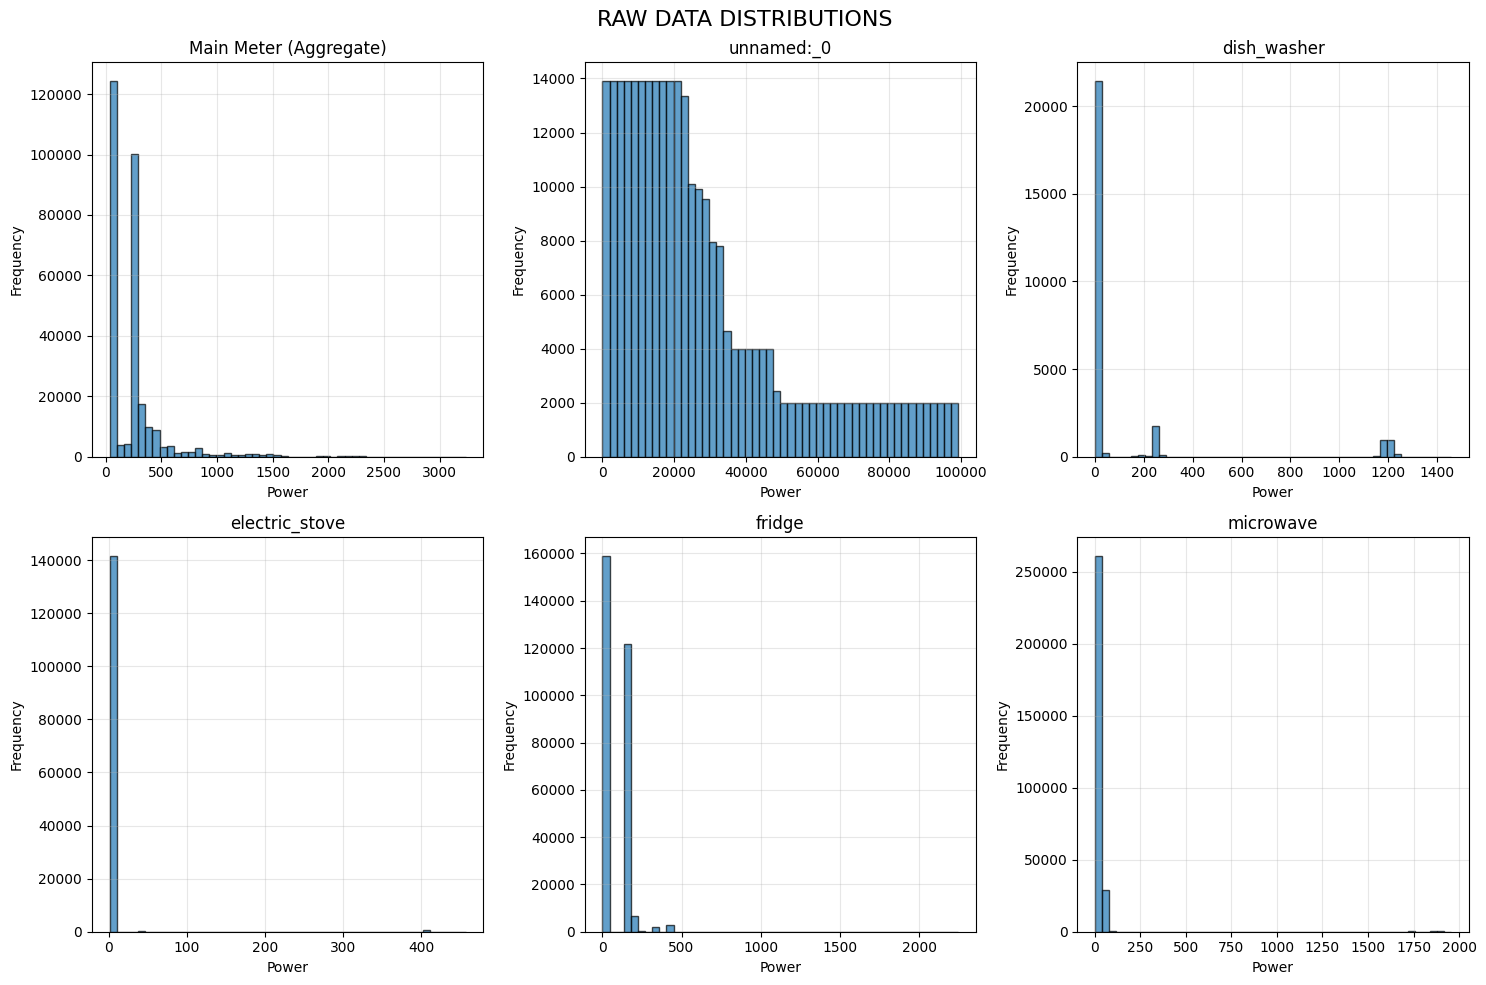


CORRECTING DATA UNITS
Main meter max: 3232.98
  Main meter seems to be in Watts (no conversion)

DATA VALIDATION

FINAL DATA STATISTICS (in Watts):
Column               Min        Max        Mean       Std        % Non-zero
--------------------------------------------------------------------------------
unnamed:_0           0.0        99257.0    28183.0    24451.9    100.0     
dish_washer          0.0        1457.0     10.8       105.1      8.8       
electric_stove       0.0        457.0      1.6        20.7       48.8      
fridge               0.0        2246.0     81.7       88.5       100.0     
microwave            0.0        1956.0     16.4       117.7      100.0     
washer_dryer         0.0        55.0       2.2        0.7        98.8      
waste_disposal_unit  0.0        609.0      0.1        3.1        1.5       
main                 36.4       3233.0     236.2      266.0      100.0     


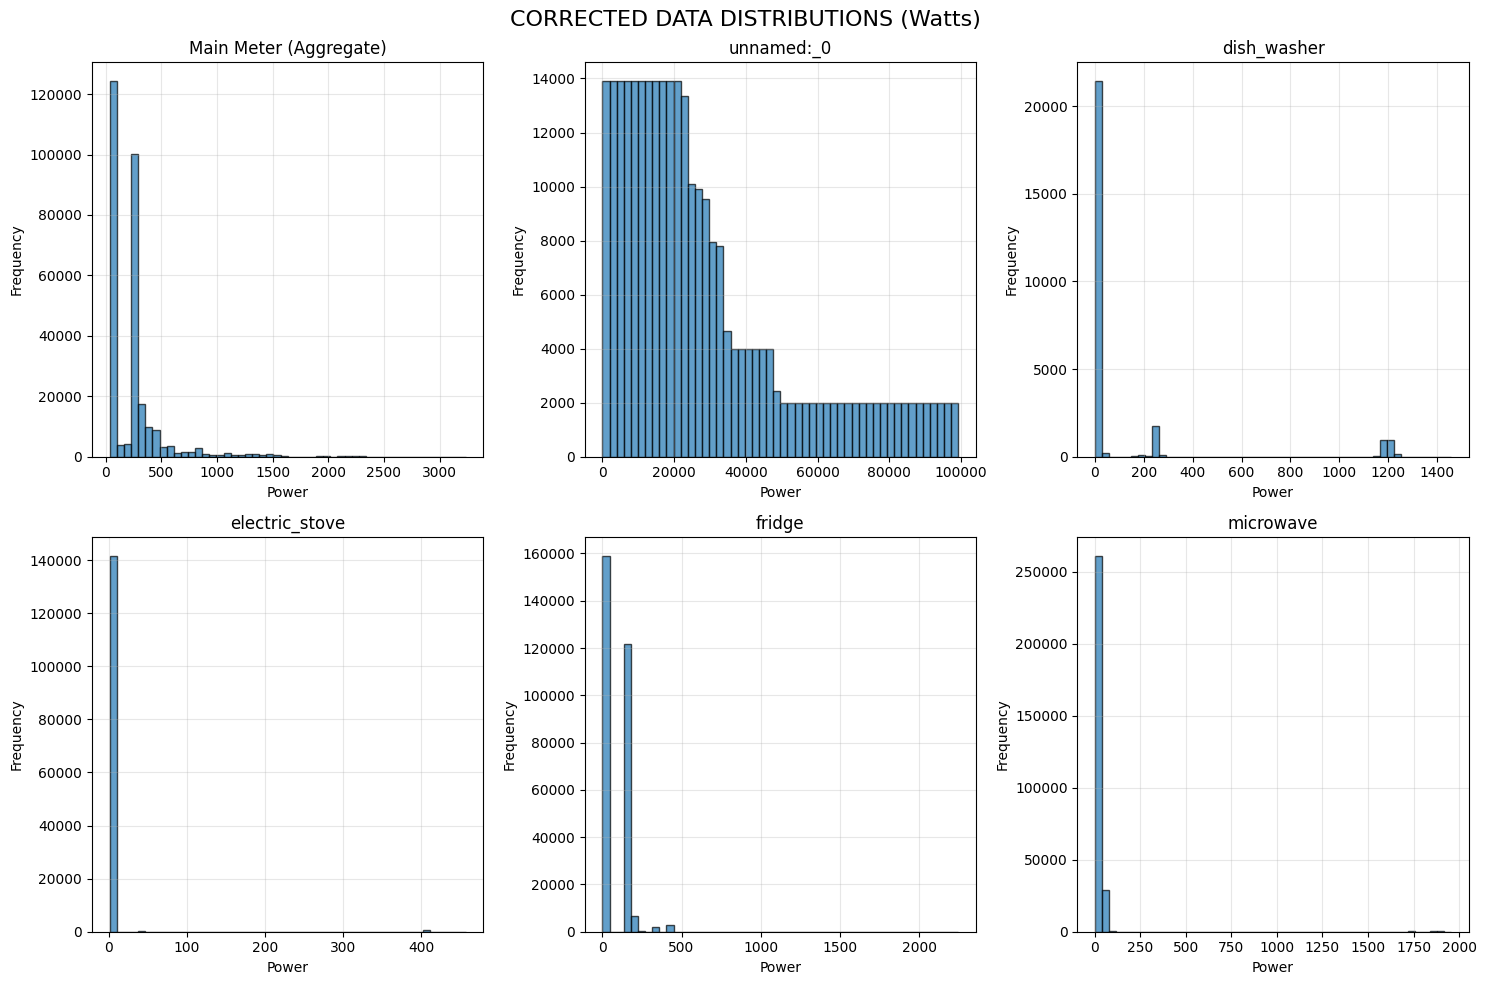


✅ Successfully loaded 292063 samples from House 2

POWER TIME SERIES VISUALIZATION


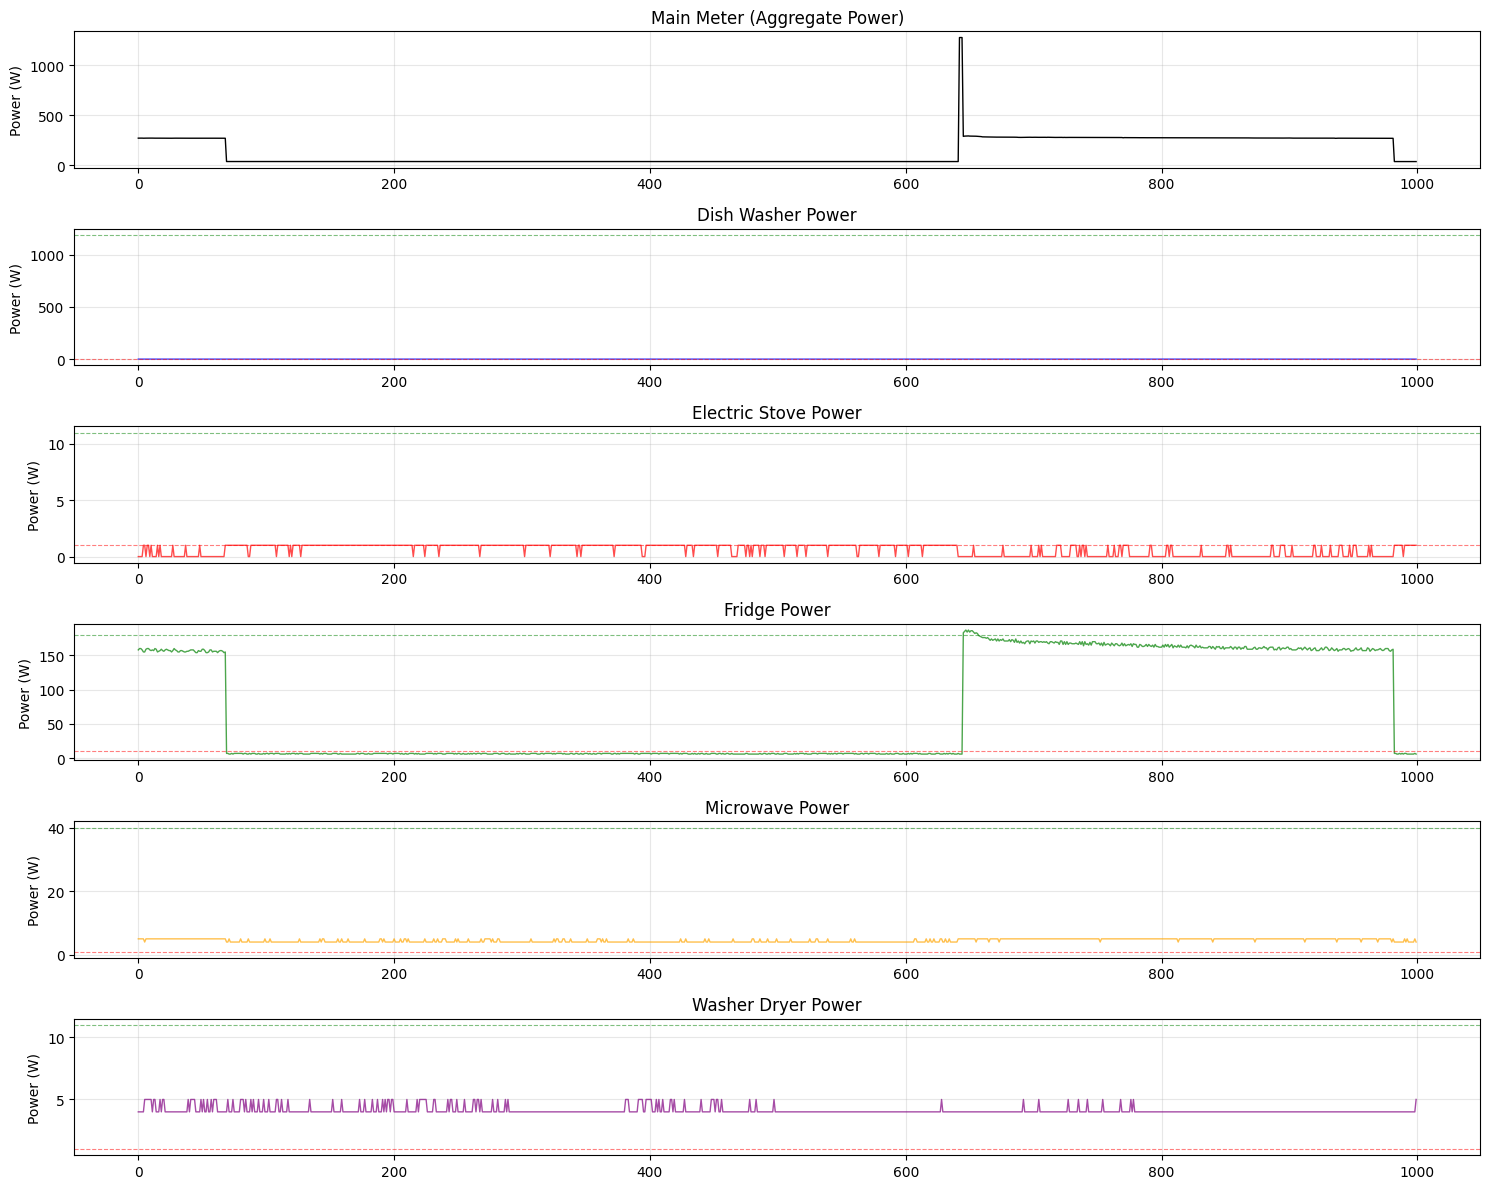


################################################################################
RUNNING EXPERIMENT WITH THRESHOLD = 5
################################################################################

EXPERIMENT: Threshold=5

CREATING APPLIANCE STATES
dish_washer         :  24,487 ON samples (8.4%)
electric_stove      : 141,512 ON samples (48.5%)
fridge              : 123,070 ON samples (42.1%)
microwave           : 260,934 ON samples (89.3%)
washer_dryer        : 288,454 ON samples (98.8%)

Thresholding Analysis (Threshold = 5):
Total samples: 292,063
Unique combinations: 31
Valid combinations (≥5): 29
Samples after thresholding: 292,057 (100.0%)

Top 10 Appliance Combinations:
  01011: dis:OFF | ele:ON | fri:OFF | mic:ON | was:ON - 105,615 samples
  00111: dis:OFF | ele:OFF | fri:ON | mic:ON | was:ON -  83,866 samples
  00011: dis:OFF | ele:OFF | fri:OFF | mic:ON | was:ON -  32,942 samples
  01111: dis:OFF | ele:ON | fri:ON | mic:ON | was:ON -  14,246 samples
  00101: dis:OFF | ele:

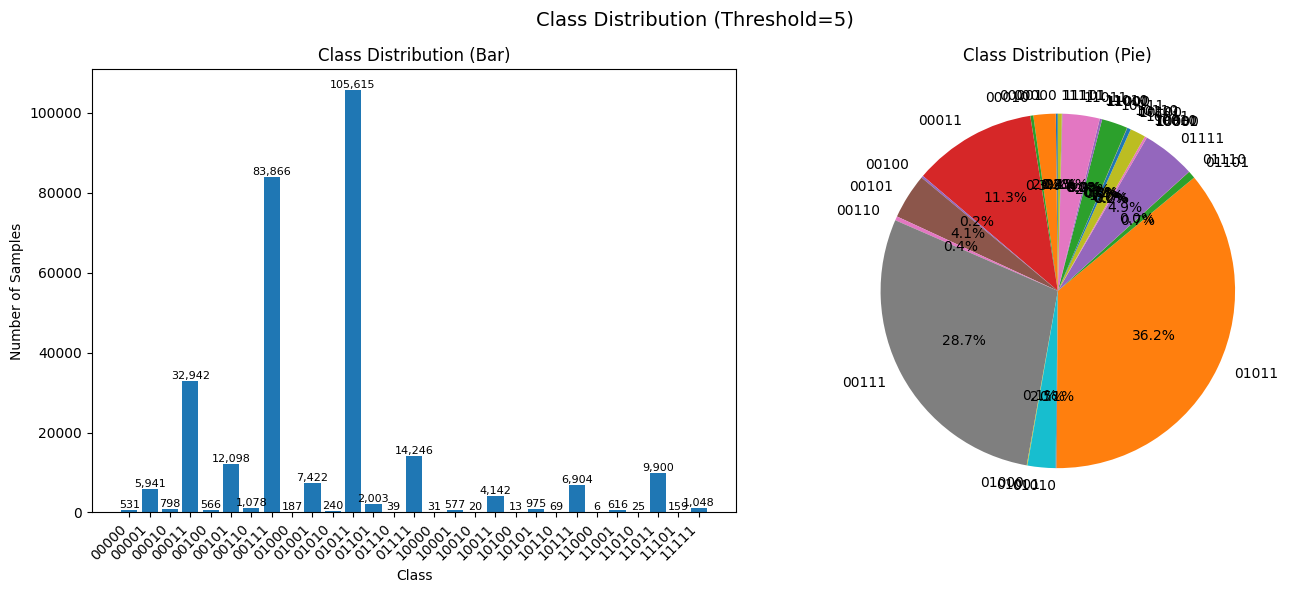


Data Split:
  Training samples: 233,645
  Testing samples: 58,412
  Number of classes: 29
  Feature dimension: 1

Training CART...
  ✓ Accuracy: 0.7137
  ✓ Macro F1: 0.2291
  ✓ Time: 0.47s

Training RF...
  ✓ Accuracy: 0.7157
  ✓ Macro F1: 0.2331
  ✓ Time: 14.68s

Training ET...
  ✓ Accuracy: 0.7149
  ✓ Macro F1: 0.2307
  ✓ Time: 5.76s

Training KNN...
  ✓ Accuracy: 0.7078
  ✓ Macro F1: 0.2075
  ✓ Time: 0.10s

Training KNN-CB...
  ✓ Accuracy: 0.7183
  ✓ Macro F1: 0.2566
  ✓ Time: 0.10s

Training LDA...
  ✓ Accuracy: 0.6280
  ✓ Macro F1: 0.0588
  ✓ Time: 0.11s

Training NB...
  ✓ Accuracy: 0.6195
  ✓ Macro F1: 0.0657
  ✓ Time: 0.04s

Results saved to: /kaggle/working/house2_results/house2_results_th5.pkl

################################################################################
RUNNING EXPERIMENT WITH THRESHOLD = 10
################################################################################

EXPERIMENT: Threshold=10

CREATING APPLIANCE STATES
dish_washer         :  24,487 O

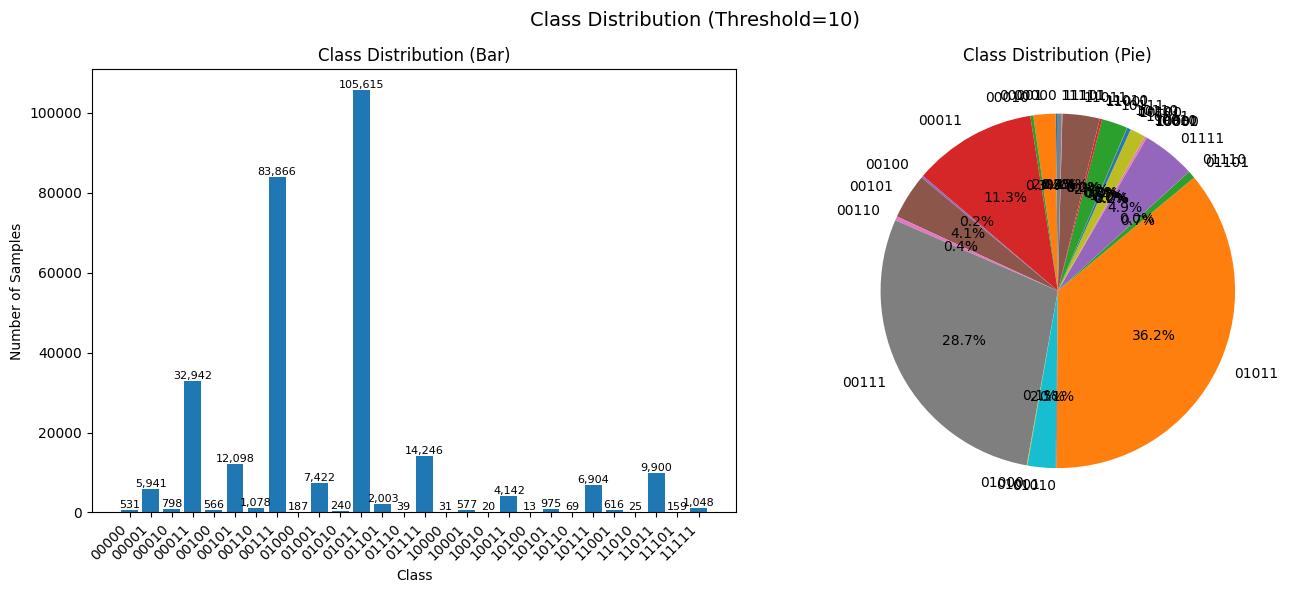


Data Split:
  Training samples: 233,640
  Testing samples: 58,411
  Number of classes: 28
  Feature dimension: 1

Training CART...
  ✓ Accuracy: 0.7136
  ✓ Macro F1: 0.2383
  ✓ Time: 0.47s

Training RF...
  ✓ Accuracy: 0.7157
  ✓ Macro F1: 0.2417
  ✓ Time: 14.74s

Training ET...
  ✓ Accuracy: 0.7149
  ✓ Macro F1: 0.2390
  ✓ Time: 5.63s

Training KNN...
  ✓ Accuracy: 0.7052
  ✓ Macro F1: 0.2110
  ✓ Time: 0.10s

Training KNN-CB...
  ✓ Accuracy: 0.7172
  ✓ Macro F1: 0.2665
  ✓ Time: 0.10s

Training LDA...
  ✓ Accuracy: 0.6280
  ✓ Macro F1: 0.0609
  ✓ Time: 0.09s

Training NB...
  ✓ Accuracy: 0.6195
  ✓ Macro F1: 0.0680
  ✓ Time: 0.04s

Results saved to: /kaggle/working/house2_results/house2_results_th10.pkl

################################################################################
RUNNING EXPERIMENT WITH THRESHOLD = 20
################################################################################

EXPERIMENT: Threshold=20

CREATING APPLIANCE STATES
dish_washer         :  24,487 

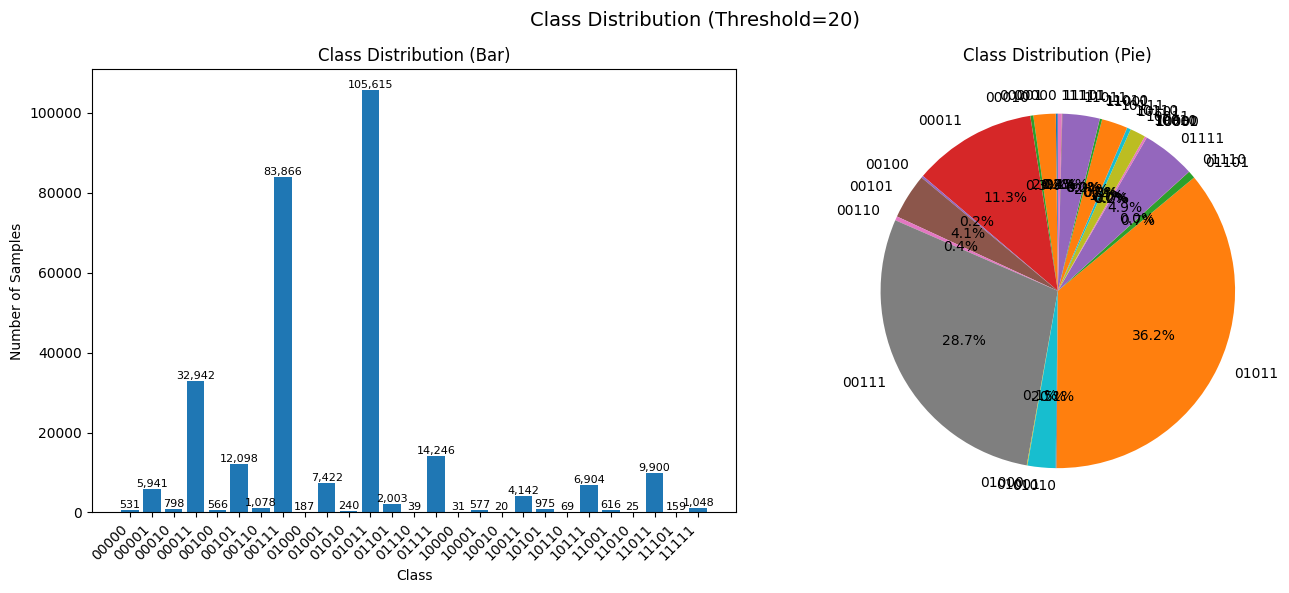


Data Split:
  Training samples: 233,630
  Testing samples: 58,408
  Number of classes: 27
  Feature dimension: 1

Training CART...
  ✓ Accuracy: 0.7136
  ✓ Macro F1: 0.2531
  ✓ Time: 0.46s

Training RF...
  ✓ Accuracy: 0.7154
  ✓ Macro F1: 0.2517
  ✓ Time: 14.55s

Training ET...
  ✓ Accuracy: 0.7147
  ✓ Macro F1: 0.2559
  ✓ Time: 5.59s

Training KNN...
  ✓ Accuracy: 0.7043
  ✓ Macro F1: 0.2244
  ✓ Time: 0.10s

Training KNN-CB...
  ✓ Accuracy: 0.7177
  ✓ Macro F1: 0.2783
  ✓ Time: 0.12s

Training LDA...
  ✓ Accuracy: 0.6280
  ✓ Macro F1: 0.0632
  ✓ Time: 0.09s

Training NB...
  ✓ Accuracy: 0.6196
  ✓ Macro F1: 0.0705
  ✓ Time: 0.04s

Results saved to: /kaggle/working/house2_results/house2_results_th20.pkl

################################################################################
RUNNING EXPERIMENT WITH THRESHOLD = 30
################################################################################

EXPERIMENT: Threshold=30

CREATING APPLIANCE STATES
dish_washer         :  24,487 

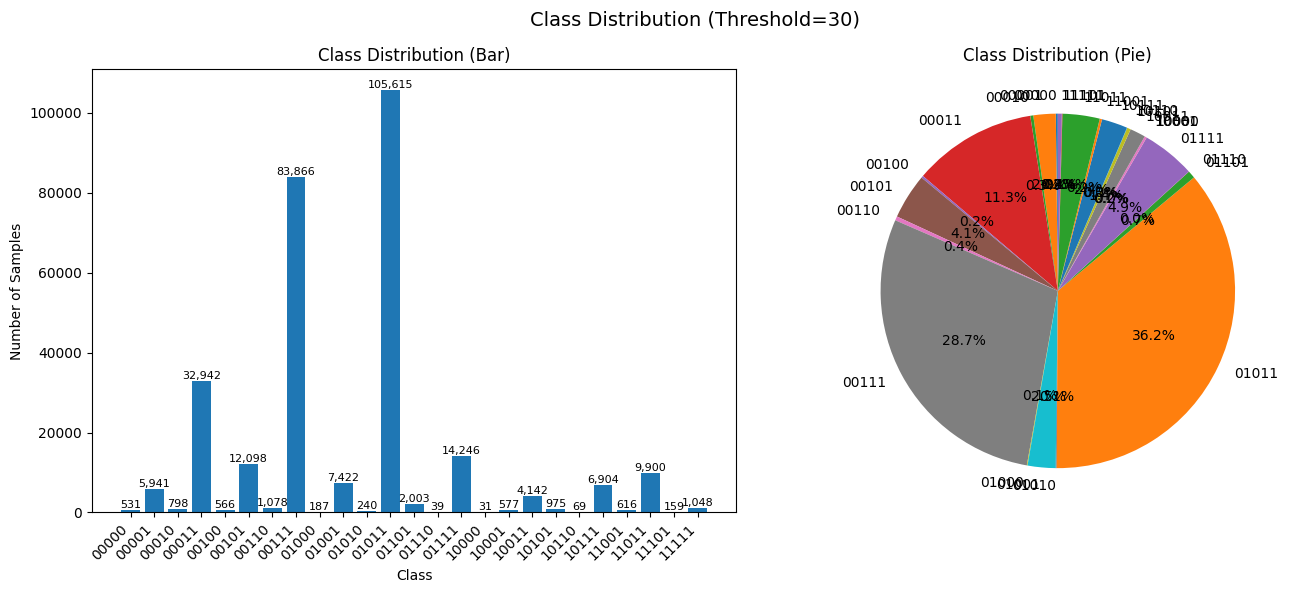


Data Split:
  Training samples: 233,594
  Testing samples: 58,399
  Number of classes: 25
  Feature dimension: 1

Training CART...
  ✓ Accuracy: 0.7138
  ✓ Macro F1: 0.2552
  ✓ Time: 0.45s

Training RF...
  ✓ Accuracy: 0.7153
  ✓ Macro F1: 0.2545
  ✓ Time: 14.05s

Training ET...
  ✓ Accuracy: 0.7147
  ✓ Macro F1: 0.2584
  ✓ Time: 5.52s

Training KNN...
  ✓ Accuracy: 0.7049
  ✓ Macro F1: 0.2418
  ✓ Time: 0.10s

Training KNN-CB...
  ✓ Accuracy: 0.7180
  ✓ Macro F1: 0.2852
  ✓ Time: 0.10s

Training LDA...
  ✓ Accuracy: 0.6281
  ✓ Macro F1: 0.0682
  ✓ Time: 0.09s

Training NB...
  ✓ Accuracy: 0.6197
  ✓ Macro F1: 0.0762
  ✓ Time: 0.03s

Results saved to: /kaggle/working/house2_results/house2_results_th30.pkl

################################################################################
RUNNING EXPERIMENT WITH THRESHOLD = 50
################################################################################

EXPERIMENT: Threshold=50

CREATING APPLIANCE STATES
dish_washer         :  24,487 

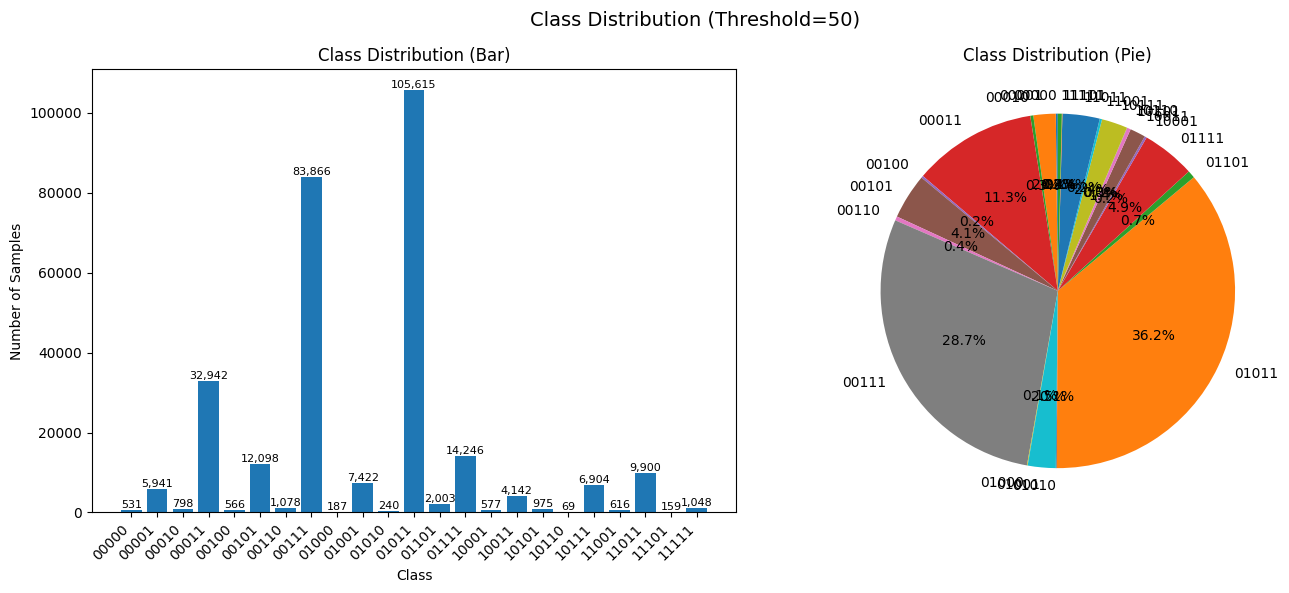


Data Split:
  Training samples: 233,538
  Testing samples: 58,385
  Number of classes: 23
  Feature dimension: 1

Training CART...
  ✓ Accuracy: 0.7141
  ✓ Macro F1: 0.2862
  ✓ Time: 0.47s

Training RF...
  ✓ Accuracy: 0.7165
  ✓ Macro F1: 0.2864
  ✓ Time: 14.26s

Training ET...
  ✓ Accuracy: 0.7152
  ✓ Macro F1: 0.2886
  ✓ Time: 5.52s

Training KNN...
  ✓ Accuracy: 0.7072
  ✓ Macro F1: 0.2605
  ✓ Time: 0.10s

Training KNN-CB...
  ✓ Accuracy: 0.7182
  ✓ Macro F1: 0.3159
  ✓ Time: 0.11s

Training LDA...
  ✓ Accuracy: 0.6283
  ✓ Macro F1: 0.0742
  ✓ Time: 0.09s

Training NB...
  ✓ Accuracy: 0.6198
  ✓ Macro F1: 0.0828
  ✓ Time: 0.04s

Results saved to: /kaggle/working/house2_results/house2_results_th50.pkl


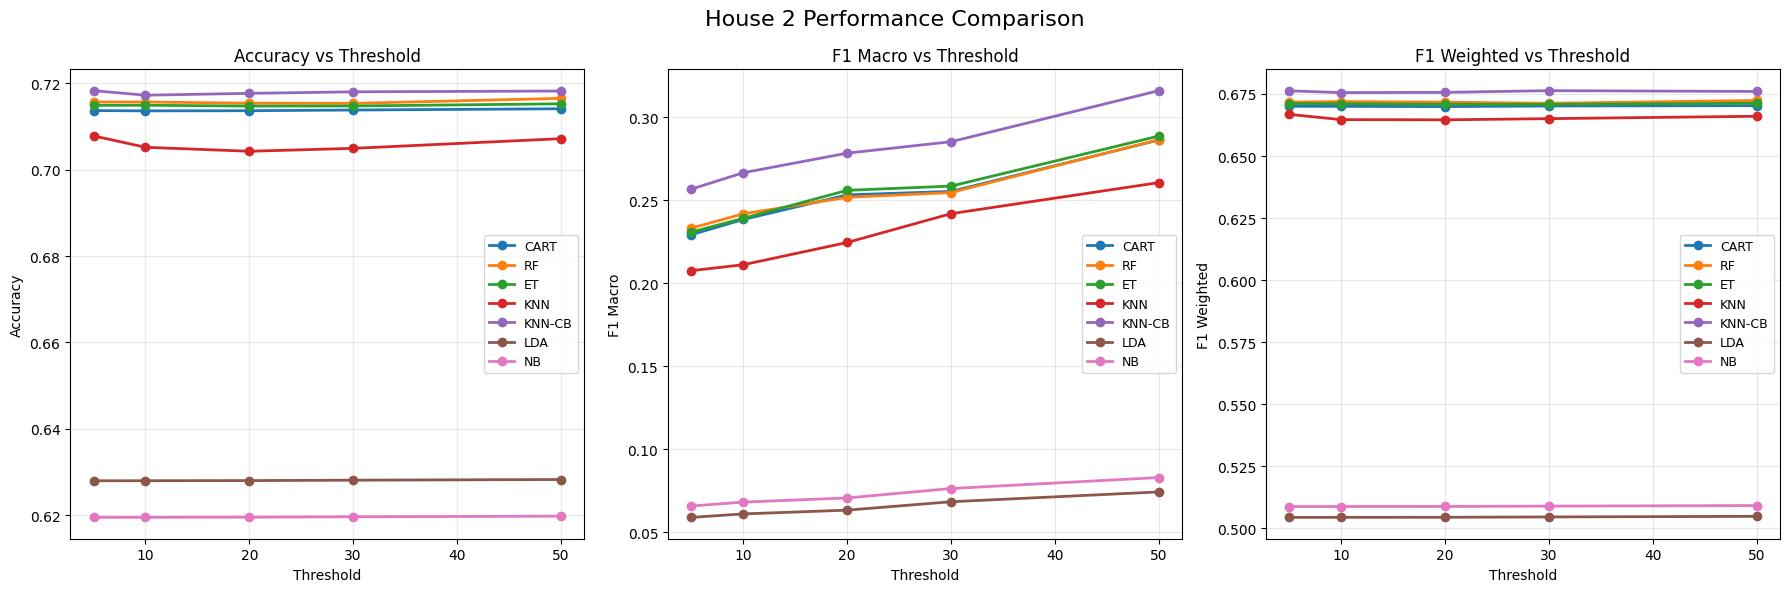


EXPERIMENT SUMMARY
Threshold  Samples    Classes    Best Classifier Best Macro F1  
--------------------------------------------------------------------------------
5          292,057    29         KNN-CB          0.2566         
10         292,051    28         KNN-CB          0.2665         
20         292,038    27         KNN-CB          0.2783         
30         291,993    25         KNN-CB          0.2852         
50         291,923    23         KNN-CB          0.3159         

EXPERIMENT COMPLETE!

All results saved to: /kaggle/working/house2_results/

Generated files:
  house2_all_experiment_results.pkl
  house2_class_distribution_th10.png
  house2_class_distribution_th20.png
  house2_class_distribution_th30.png
  house2_class_distribution_th5.png
  house2_class_distribution_th50.png
  house2_corrected_distributions.png
  house2_macro_metrics_Th10_WindowingFalse.png
  house2_macro_metrics_Th10_WindowingTrue.png
  house2_macro_metrics_Th10_WindowingTrue_Adaptive.png
  house2_

In [2]:
# ===================== COMPLETE ML PIPELINE =====================
# Cell 7: Complete experiment pipeline

def create_appliance_states(df, power_windows, verbose=True):
    """Create binary states based on power windows"""
    df_states = df.copy()
    
    if verbose:
        print("\n" + "="*80)
        print("CREATING APPLIANCE STATES")
        print("="*80)
    
    for appliance, (lower, upper) in power_windows.items():
        if appliance in df_states.columns:
            # Create binary state: 1 if power within window, 0 otherwise
            state_series = ((df_states[appliance] >= lower) & 
                           (df_states[appliance] <= upper)).astype(int)
            df_states[f"{appliance}_state"] = state_series
            
            if verbose:
                on_samples = state_series.sum()
                pct_on = on_samples / len(df_states) * 100
                print(f"{appliance:20s}: {on_samples:7,d} ON samples ({pct_on:.1f}%)")
    
    return df_states

def create_multiclass_labels(df_states, selected_appliances, threshold=10, verbose=True):
    """Create multiclass labels with thresholding"""
    
    # Get state columns
    state_columns = [f"{app}_state" for app in selected_appliances 
                     if f"{app}_state" in df_states.columns]
    
    if not state_columns:
        raise ValueError("No state columns found!")
    
    # Sort for consistency
    state_columns = sorted(state_columns)
    
    # Create binary combination string
    df_states['binary_combination'] = df_states[state_columns].astype(str).agg(''.join, axis=1)
    
    # Apply thresholding
    combination_counts = df_states['binary_combination'].value_counts()
    valid_combinations = combination_counts[combination_counts >= threshold].index
    df_filtered = df_states[df_states['binary_combination'].isin(valid_combinations)].copy()
    
    if verbose:
        print(f"\nThresholding Analysis (Threshold = {threshold}):")
        print(f"Total samples: {len(df_states):,}")
        print(f"Unique combinations: {len(combination_counts)}")
        print(f"Valid combinations (≥{threshold}): {len(valid_combinations)}")
        print(f"Samples after thresholding: {len(df_filtered):,} ({len(df_filtered)/len(df_states)*100:.1f}%)")
        
        # Show top combinations
        print("\nTop 10 Appliance Combinations:")
        top_combos = combination_counts.head(10)
        for combo, count in top_combos.items():
            # Decode binary string
            states = []
            for i, app in enumerate(selected_appliances):
                if i < len(combo):
                    state = "ON" if combo[i] == '1' else "OFF"
                    states.append(f"{app[:3]}:{state}")
            state_str = " | ".join(states)
            print(f"  {combo}: {state_str} - {count:7,d} samples")
    
    # Encode labels
    label_encoder = LabelEncoder()
    df_filtered['label'] = label_encoder.fit_transform(df_filtered['binary_combination'])
    
    # Features: only aggregate power (main)
    X = df_filtered[['main']].values.astype(np.float32)
    y = df_filtered['label'].values
    
    return X, y, label_encoder, df_filtered

def plot_class_distribution(y, label_encoder, title="Class Distribution"):
    """Plot distribution of classes"""
    unique_classes, class_counts = np.unique(y, return_counts=True)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Bar plot
    class_labels = [label_encoder.inverse_transform([cls])[0] for cls in unique_classes]
    bars = ax1.bar(range(len(unique_classes)), class_counts)
    ax1.set_xlabel('Class')
    ax1.set_ylabel('Number of Samples')
    ax1.set_title('Class Distribution (Bar)')
    ax1.set_xticks(range(len(unique_classes)))
    ax1.set_xticklabels(class_labels, rotation=45, ha='right')
    
    # Add counts on bars
    for bar, count in zip(bars, class_counts):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{count:,}', ha='center', va='bottom', fontsize=8)
    
    # Pie chart
    ax2.pie(class_counts, labels=class_labels, autopct='%1.1f%%', startangle=90)
    ax2.set_title('Class Distribution (Pie)')
    
    plt.suptitle(title, fontsize=14)
    plt.tight_layout()
    return fig

def run_experiment(df, power_windows, threshold=20, test_size=0.2, random_state=42):
    """Run complete experiment pipeline"""
    print("\n" + "="*80)
    print(f"EXPERIMENT: Threshold={threshold}")
    print("="*80)
    
    # Step 1: Create appliance states
    df_states = create_appliance_states(df, power_windows, verbose=True)
    
    # Step 2: Create multiclass labels
    X, y, label_encoder, df_filtered = create_multiclass_labels(
        df_states, list(power_windows.keys()), threshold=threshold, verbose=True
    )
    
    # Check if we have enough classes
    n_classes = len(np.unique(y))
    if n_classes < 2:
        print(f"ERROR: Only {n_classes} class(es). Need at least 2.")
        return None
    
    # Step 3: Plot class distribution
    fig = plot_class_distribution(y, label_encoder, f"Class Distribution (Threshold={threshold})")
    plt.savefig(os.path.join(OUTPUT_PATH, f'house2_class_distribution_th{threshold}.png'))
    plt.show()
    
    # Step 4: Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )
    
    print(f"\nData Split:")
    print(f"  Training samples: {len(X_train):,}")
    print(f"  Testing samples: {len(X_test):,}")
    print(f"  Number of classes: {n_classes}")
    print(f"  Feature dimension: {X.shape[1]}")
    
    # Step 5: Train and evaluate classifiers
    classifiers = {
        'CART': DecisionTreeClassifier(random_state=random_state),
        'RF': RandomForestClassifier(n_estimators=100, random_state=random_state, n_jobs=-1),
        'ET': ExtraTreesClassifier(n_estimators=100, random_state=random_state, n_jobs=-1),
        'KNN': KNeighborsClassifier(n_neighbors=5, n_jobs=-1),
        'KNN-CB': KNeighborsClassifier(n_neighbors=10, weights='distance', metric='manhattan', n_jobs=-1),
        'LDA': LinearDiscriminantAnalysis(),
        'NB': GaussianNB()
    }
    
    results = {}
    
    for name, clf in classifiers.items():
        try:
            print(f"\nTraining {name}...")
            start_time = time.time()
            
            # Scale features
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)
            
            # Train
            clf.fit(X_train_scaled, y_train)
            train_time = time.time() - start_time
            
            # Predict
            y_pred = clf.predict(X_test_scaled)
            
            # Calculate metrics
            results[name] = {
                'accuracy': accuracy_score(y_test, y_pred),
                'precision_macro': precision_score(y_test, y_pred, average='macro', zero_division=0),
                'recall_macro': recall_score(y_test, y_pred, average='macro', zero_division=0),
                'f1_macro': f1_score(y_test, y_pred, average='macro', zero_division=0),
                'precision_weighted': precision_score(y_test, y_pred, average='weighted', zero_division=0),
                'recall_weighted': recall_score(y_test, y_pred, average='weighted', zero_division=0),
                'f1_weighted': f1_score(y_test, y_pred, average='weighted', zero_division=0),
                'train_time': train_time
            }
            
            print(f"  ✓ Accuracy: {results[name]['accuracy']:.4f}")
            print(f"  ✓ Macro F1: {results[name]['f1_macro']:.4f}")
            print(f"  ✓ Time: {train_time:.2f}s")
            
        except Exception as e:
            print(f"  ✗ Error: {e}")
            results[name] = None
    
    return results, df_filtered, label_encoder

def plot_results_comparison(all_results, thresholds, title="Performance Comparison"):
    """Plot results across different thresholds"""
    classifiers = ['CART', 'RF', 'ET', 'KNN', 'KNN-CB', 'LDA', 'NB']
    metrics = ['accuracy', 'f1_macro', 'f1_weighted']
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    for idx, metric in enumerate(metrics):
        ax = axes[idx]
        
        for clf in classifiers:
            values = []
            for th in thresholds:
                if th in all_results and all_results[th] and clf in all_results[th][0]:
                    if all_results[th][0][clf]:
                        values.append(all_results[th][0][clf][metric])
                    else:
                        values.append(np.nan)
                else:
                    values.append(np.nan)
            
            ax.plot(thresholds, values, marker='o', label=clf, linewidth=2)
        
        ax.set_xlabel('Threshold')
        ax.set_ylabel(metric.replace('_', ' ').title())
        ax.set_title(f'{metric.replace("_", " ").title()} vs Threshold')
        ax.grid(True, alpha=0.3)
        ax.legend(fontsize=9)
    
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_PATH, 'house2_threshold_comparison.png'))
    plt.show()

# ===================== MAIN EXPERIMENT =====================
# Cell 8: Run main experiment

def main_experiment():
    # Load data using the corrected loader
    loader = REDDDataLoaderHouse2(DATA_PATH, ConfigHouse2.HOUSE_NUMBER)
    df_house2 = loader.load_house_data()
    
    # Use adaptive windows from diagnostic
    adaptive_windows = {
        'dish_washer': (1, 1190),
        'electric_stove': (1, 11),
        'fridge': (10, 180),
        'microwave': (1, 40),
        'washer_dryer': (1, 11)
    }
    
    # Plot power time series
    print("\n" + "="*80)
    print("POWER TIME SERIES VISUALIZATION")
    print("="*80)
    
    fig, axes = plt.subplots(6, 1, figsize=(15, 12))
    sample_size = min(1000, len(df_house2))
    df_sample = df_house2.iloc[:sample_size]
    
    # Plot main meter
    axes[0].plot(df_sample['main'].values, linewidth=1, color='black')
    axes[0].set_title('Main Meter (Aggregate Power)')
    axes[0].set_ylabel('Power (W)')
    axes[0].grid(True, alpha=0.3)
    
    # Plot individual appliances
    appliances = ['dish_washer', 'electric_stove', 'fridge', 'microwave', 'washer_dryer']
    colors = ['blue', 'red', 'green', 'orange', 'purple']
    
    for idx, (appliance, color) in enumerate(zip(appliances, colors), 1):
        if appliance in df_sample.columns:
            axes[idx].plot(df_sample[appliance].values, linewidth=1, color=color, alpha=0.7)
            axes[idx].set_title(f'{appliance.replace("_", " ").title()} Power')
            axes[idx].set_ylabel('Power (W)')
            axes[idx].grid(True, alpha=0.3)
            
            # Add window lines
            if appliance in adaptive_windows:
                lower, upper = adaptive_windows[appliance]
                axes[idx].axhline(y=lower, color='r', linestyle='--', alpha=0.5, linewidth=0.8)
                axes[idx].axhline(y=upper, color='g', linestyle='--', alpha=0.5, linewidth=0.8)
    
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_PATH, 'house2_power_time_series.png'))
    plt.show()
    
    # Run experiments with different thresholds
    all_results = {}
    thresholds_to_test = [5, 10, 20, 30, 50]
    
    for threshold in thresholds_to_test:
        print(f"\n{'#'*80}")
        print(f"RUNNING EXPERIMENT WITH THRESHOLD = {threshold}")
        print(f"{'#'*80}")
        
        try:
            results, df_filtered, label_encoder = run_experiment(
                df_house2, 
                adaptive_windows, 
                threshold=threshold,
                test_size=ConfigHouse2.TEST_SIZE,
                random_state=ConfigHouse2.RANDOM_STATE
            )
            
            if results:
                all_results[threshold] = (results, df_filtered, label_encoder)
                
                # Save results
                results_file = os.path.join(OUTPUT_PATH, f'house2_results_th{threshold}.pkl')
                joblib.dump({
                    'threshold': threshold,
                    'results': results,
                    'label_encoder': label_encoder,
                    'n_samples': len(df_filtered),
                    'n_classes': len(np.unique(df_filtered['label']))
                }, results_file)
                print(f"\nResults saved to: {results_file}")
                
        except Exception as e:
            print(f"Error running experiment with threshold={threshold}: {e}")
            continue
    
    # Plot comparison across thresholds
    if all_results:
        plot_results_comparison(all_results, thresholds_to_test, "House 2 Performance Comparison")
        
        # Print summary table
        print("\n" + "="*80)
        print("EXPERIMENT SUMMARY")
        print("="*80)
        print(f"{'Threshold':<10} {'Samples':<10} {'Classes':<10} {'Best Classifier':<15} {'Best Macro F1':<15}")
        print("-"*80)
        
        for th in thresholds_to_test:
            if th in all_results:
                results, df_filtered, _ = all_results[th]
                
                # Find best classifier
                best_clf = None
                best_f1 = 0
                for clf_name, clf_results in results.items():
                    if clf_results and clf_results['f1_macro'] > best_f1:
                        best_f1 = clf_results['f1_macro']
                        best_clf = clf_name
                
                if best_clf:
                    print(f"{th:<10} {len(df_filtered):<10,} {len(np.unique(df_filtered['label'])):<10} "
                          f"{best_clf:<15} {best_f1:<15.4f}")
    
    return all_results

# ===================== RUN THE EXPERIMENT =====================
# Cell 9: Execute main experiment
if __name__ == "__main__":
    # Run main experiment
    final_results = main_experiment()
    
    print("\n" + "="*80)
    print("EXPERIMENT COMPLETE!")
    print("="*80)
    print(f"\nAll results saved to: {OUTPUT_PATH}")
    
    # List generated files
    print("\nGenerated files:")
    for file in sorted(os.listdir(OUTPUT_PATH)):
        if file.endswith(('.png', '.pkl')):
            print(f"  {file}")